In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('clean.csv')

# Validation

Some ``mloc`` labels are not valid. Let's try to correct that.

<AxesSubplot:>

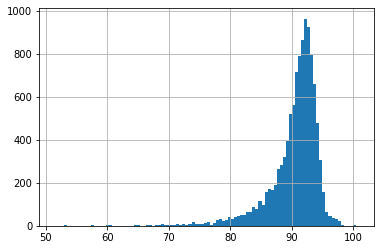

In [3]:
df.LAB_L[df.mloc=='dmin'].hist(bins=100)

<AxesSubplot:>

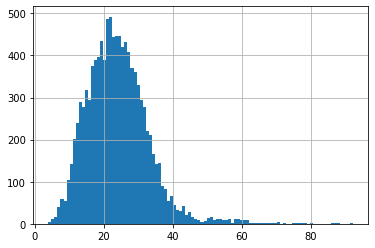

In [4]:
df.LAB_L[df.mloc=='dmax'].hist(bins=100)

In [5]:
df[['cat','LAB_L','mloc']].groupby(['cat','mloc']).agg(np.var).groupby('mloc').agg(np.median)

,LAB_L
mloc,
dmax,0.291033
dmin,0.065567


Okay, so now we have some estimates for where the variance _should_ be within a ``catloc``. Let's find violations of that.

In [6]:
tmp = df[['cat','LAB_L','mloc']].groupby(['cat','mloc']).agg(np.var).reset_index()

In [7]:
tmp = tmp[tmp.mloc=='dmax'].sort_values('LAB_L',ascending=False)

In [8]:
unevencats = []
for cat in tmp.cat:
    t = df[df.cat==cat]
    mlocs = list(t.mloc.unique())
    if len(mlocs)==1:
        unevencats.append(cat)

In [9]:
for cat in unevencats:
    tmp = df[df.cat==cat]
    mlocs = tmp.mloc.unique()
    assert len(mlocs)==1
    mloc = mlocs[0]
    print(mloc)
    if mloc=='dmax':
        print(cat,list(tmp.LAB_L))

dmax
5532h [23.83, 24.49, 24.03, 92.15, 91.78, 91.68]
dmax
4790s [20.86, 21.45, 22.22, 87.87, 86.58, 87.12]
dmax
1880g [39.17, 41.92, 38.94]
dmax
1880d [22.52, 19.96, 20.85]
dmax
1880t [30.07, 32.11, 30.06]
dmax
904b [18.94, 16.78, 17.07]
dmax
4790g [35.91, 38.13, 36.42]
dmax
4790j [21.65, 23.62, 21.65]
dmax
4789l [32.83, 32.73, 34.61]
dmax
2088q [26.29, 25.27, 25.17]
dmax
1023k [27.31, 26.79, 27.55]
dmax
5464oo [14.12, 14.34, 14.2]
dmax
4789d [26.69, 26.5, 26.51]
dmax
294u [17.28, 17.29, 17.39]
dmax
4790e [22.8, 22.83, 22.76]
dmax
904y [17.77, 17.76, 17.76]


In [10]:
df.mloc[(df.cat=='5532h')&(df.LAB_L > 30)] = 'dmin'

In [11]:
df.mloc[(df.cat=='4790s')&(df.LAB_L > 30)] = 'dmin'

In [12]:
unevencats.remove('5532h')
unevencats.remove('4790s')

In [13]:
for cat in unevencats:
    tmp = df[df.cat==cat]
    mlocs = tmp.mloc.unique()
    assert len(mlocs)==1
    mloc = mlocs[0]
    if mloc=='dmin':
        print(cat,list(tmp.LAB_L))

In [14]:
tmp = df[['cat','LAB_L','mloc']].groupby(['cat','mloc']).agg(np.var).reset_index()
tmp = tmp[tmp.mloc=='dmin'].sort_values('LAB_L',ascending=False)

In [15]:
for cat in tmp.cat:
    t = df[df.cat==cat]
    mlocs = list(t.mloc.unique())
    if len(mlocs)==1:
        print(cat,mlocs,len(t))

904hh ['dmin'] 3
4789n ['dmin'] 3
1880f ['dmin'] 3
905b ['dmin'] 3
1880y ['dmin'] 3
904j ['dmin'] 3
4789a ['dmin'] 3
4790p ['dmin'] 3
4790k ['dmin'] 3
3189k ['dmin'] 3
1880h ['dmin'] 3
3189l ['dmin'] 3
5444l ['dmin'] 3
904p ['dmin'] 3
4789k ['dmin'] 3
2088o ['dmin'] 3
4789c ['dmin'] 3
4789b ['dmin'] 3
4789h ['dmin'] 3
3189d ['dmin'] 3
904n ['dmin'] 3
3189h ['dmin'] 3
1880x ['dmin'] 3
904u ['dmin'] 3
4790m ['dmin'] 3
1023l ['dmin'] 3
4790h ['dmin'] 3
1880k ['dmin'] 3
4789i ['dmin'] 3
904g ['dmin'] 3
905n ['dmin'] 3
5444a ['dmin'] 3
905h ['dmin'] 3
904o ['dmin'] 3
905a ['dmin'] 3
5444c ['dmin'] 3
905j ['dmin'] 3
1880c ['dmin'] 3
5444d ['dmin'] 3
905e ['dmin'] 3
4789f ['dmin'] 3
904e ['dmin'] 3
3189b ['dmin'] 3
5514y ['dmin'] 3
905f ['dmin'] 3
904t ['dmin'] 3
905m ['dmin'] 3
5513y ['dmin'] 3
904i ['dmin'] 3


### mtrial issue

In [16]:
df['catrial'] = [df.cat.loc[i] + "_" + str(df.mtrial.loc[i]) for i in df.index]

In [17]:
df.mtrial[(df.catrial=='2372p_2')&(df.mloc=='dmax')] = '1'
df.mtrial[(df.catrial=='2372p_3')&(df.mloc=='dmax')] = '2'

In [18]:
df['catrial'] = [df.cat.loc[i] + "_" + str(df.mtrial.loc[i]) for i in df.index]

### save

In [19]:
df.to_csv('valid.csv',index=False)